In [47]:
import pandas as pd

df_sell_date_column = pd.read_csv("df_sell_date_column.csv")
df_sell_date_column = df_sell_date_column.drop(['Unnamed: 0'], axis = 1)
df_evaluation = pd.read_csv("data/m5-forecasting-accuracy/sales_train_evaluation.csv")

In [48]:
import matplotlib.pyplot as plt


In [49]:
df_sell_date_column

,id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
0,FOODS_1_001_CA_1_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.48,8.96,0.00,0.00,0.00,0.00,6.72,6.72,0.00,2.24
1,FOODS_1_001_CA_2_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.24,4.48,2.24,2.24,0.00,0.00,0.00,0.00,0.00
2,FOODS_1_001_CA_3_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.24,0.00,4.48,0.00,0.00,0.00,4.48,6.72,0.00,2.24
3,FOODS_1_001_CA_4_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.24,2.24,0.00,8.96,0.00,2.24,6.72,0.00,4.48,13.44
4,FOODS_1_001_TX_1_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,4.48,2.24,0.00,0.00,4.48,2.24,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,HOUSEHOLD_2_516_TX_2_evaluation,0.0,0.00,11.88,11.88,0.00,17.82,5.94,23.76,5.94,...,5.94,0.00,17.82,0.00,5.94,5.94,0.00,0.00,5.94,5.94
30486,HOUSEHOLD_2_516_TX_3_evaluation,0.0,0.00,0.00,0.00,0.00,29.70,0.00,5.94,5.94,...,0.00,0.00,0.00,0.00,0.00,0.00,5.94,0.00,5.94,0.00
30487,HOUSEHOLD_2_516_WI_1_evaluation,0.0,35.64,0.00,11.88,11.88,23.76,5.94,47.52,29.70,...,0.00,0.00,5.94,11.88,0.00,5.94,0.00,5.94,0.00,11.88
30488,HOUSEHOLD_2_516_WI_2_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.94,5.94,5.94,23.76,35.64,0.00,5.94,5.94,5.94,0.00


In [50]:
data_melt = df_sell_date_column.melt(id_vars='id', var_name='Date', value_name='Daily_total_sales')

In [51]:
data_melt_and_ids = data_melt.merge(df_evaluation[['id','item_id', 'dept_id','cat_id','store_id','state_id']], on = 'id')

In [52]:
data_melt_and_ids

,id,Date,Daily_total_sales,item_id,dept_id,cat_id,store_id,state_id
0,FOODS_1_001_CA_1_evaluation,2011-01-29,0.00,FOODS_1_001,FOODS_1,FOODS,CA_1,CA
1,FOODS_1_001_CA_1_evaluation,2011-01-30,0.00,FOODS_1_001,FOODS_1,FOODS,CA_1,CA
2,FOODS_1_001_CA_1_evaluation,2011-01-31,0.00,FOODS_1_001,FOODS_1,FOODS,CA_1,CA
3,FOODS_1_001_CA_1_evaluation,2011-02-01,0.00,FOODS_1_001,FOODS_1,FOODS,CA_1,CA
4,FOODS_1_001_CA_1_evaluation,2011-02-02,0.00,FOODS_1_001,FOODS_1,FOODS,CA_1,CA
...,...,...,...,...,...,...,...,...
59181085,HOUSEHOLD_2_516_WI_3_evaluation,2016-05-18,0.00,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI
59181086,HOUSEHOLD_2_516_WI_3_evaluation,2016-05-19,11.88,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI
59181087,HOUSEHOLD_2_516_WI_3_evaluation,2016-05-20,11.88,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI
59181088,HOUSEHOLD_2_516_WI_3_evaluation,2016-05-21,29.70,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI


In [53]:
data_melt_and_ids['Date'] = pd.to_datetime(data_melt_and_ids['Date'])


In [54]:
data_melt_and_ids['dept_id'].unique()

array(['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2',
       'HOUSEHOLD_1', 'HOUSEHOLD_2'], dtype=object)

In [55]:
import seaborn as sns

data_CA = data_melt_and_ids.loc[data_melt_and_ids['state_id'] == 'CA']
data_TX = data_melt_and_ids.loc[data_melt_and_ids['state_id'] == 'TX']
data_CA = data_melt_and_ids.loc[data_melt_and_ids['state_id'] == 'CA']




In [56]:
total_sales_by_store_CA = data_CA.groupby(['Date','store_id'])['Daily_total_sales'].sum().unstack()

In [57]:
data_CA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23672436 entries, 0 to 59169443
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 object        
 1   Date               datetime64[ns]
 2   Daily_total_sales  float64       
 3   item_id            object        
 4   dept_id            object        
 5   cat_id             object        
 6   store_id           object        
 7   state_id           object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 1.6+ GB


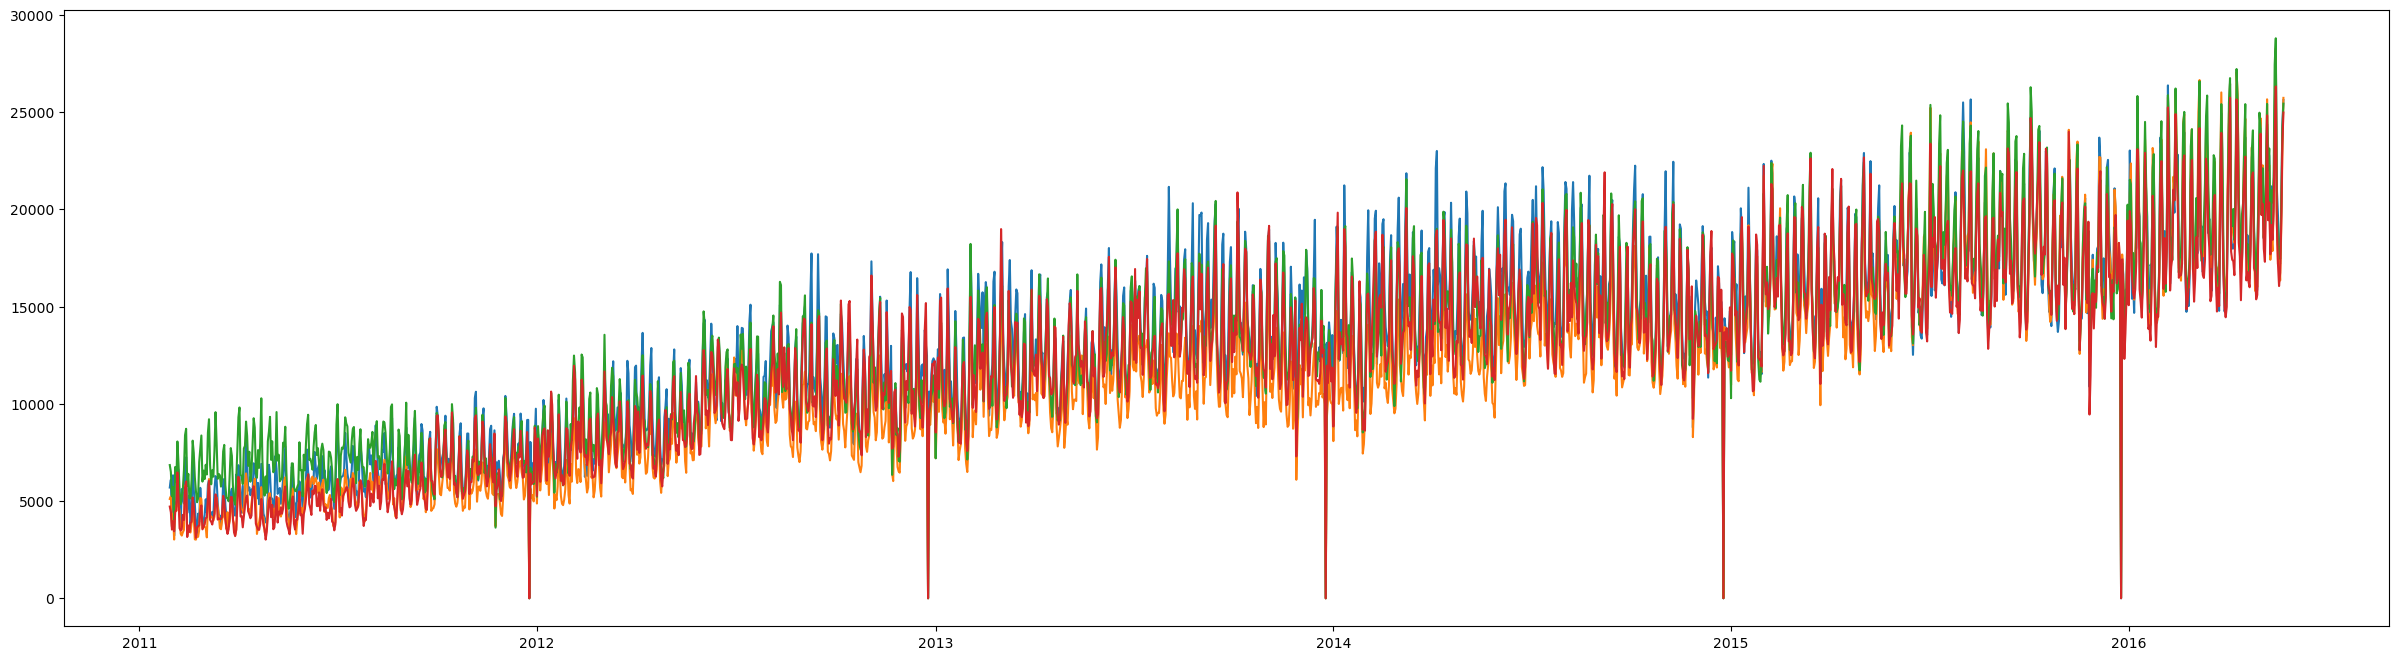

In [65]:
plt.figure(figsize=(30, 8))
plt.plot(total_sales_by_store_CA)
plt.show()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Daily_total_sales'>

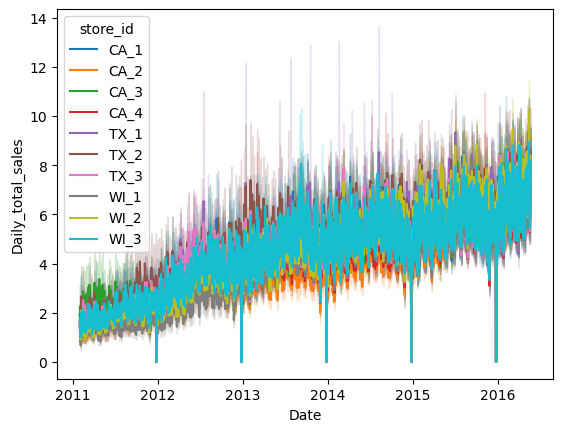

In [61]:
sns.lineplot(x = 'Date', y = 'Daily_total_sales',hue = 'store_id', data = data_melt_and_ids)